In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv("myntra202305041052.csv")

In [20]:
df.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...


In [7]:
df.shape

(1060213, 11)

In [9]:
df.columns

Index(['id', 'name', 'img', 'asin', 'price', 'mrp', 'rating', 'ratingTotal',
       'discount', 'seller', 'purl'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060213 entries, 0 to 1060212
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1060213 non-null  int64  
 1   name         1060213 non-null  object 
 2   img          1060213 non-null  object 
 3   asin         1060213 non-null  object 
 4   price        1060213 non-null  float64
 5   mrp          1060213 non-null  float64
 6   rating       1060213 non-null  float64
 7   ratingTotal  1060213 non-null  int64  
 8   discount     1060213 non-null  int64  
 9   seller       1060213 non-null  object 
 10  purl         1060213 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 89.0+ MB


In [11]:
#dropping irrelevant columns(img,asin,purl,id) for analysis
df= df.drop(['img','asin','purl','id'],axis=1) #axis=1 -> removing specified columns

In [13]:
df.head()

,name,price,mrp,rating,ratingTotal,discount,seller
0,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion
1,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster
2,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER
3,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap
4,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster


In [14]:
#checing if there are any missing values
missing= df.isnull().sum()
missing #-> no missing values

name           0
price          0
mrp            0
rating         0
ratingTotal    0
discount       0
seller         0
dtype: int64

In [15]:
#checing again columns and info
df.columns

Index(['name', 'price', 'mrp', 'rating', 'ratingTotal', 'discount', 'seller'], dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060213 entries, 0 to 1060212
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   name         1060213 non-null  object 
 1   price        1060213 non-null  float64
 2   mrp          1060213 non-null  float64
 3   rating       1060213 non-null  float64
 4   ratingTotal  1060213 non-null  int64  
 5   discount     1060213 non-null  int64  
 6   seller       1060213 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 56.6+ MB


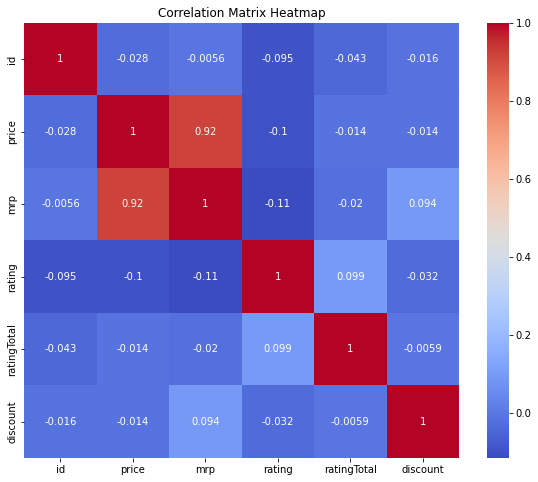

In [21]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()
#price and MRP have a very high correlation

# Name of products

In [22]:
name_counts=df['name'].value_counts()

In [24]:
top5_name=name_counts.head(5)
top5_name

Men Polo Collar T-shirt           5644
Gold-Plated Jewellery Set         5485
Men Typography Printed T-shirt    4326
Printed Round Neck T-shirt        4055
Men Slim Fit Jeans                4046
Name: name, dtype: int64

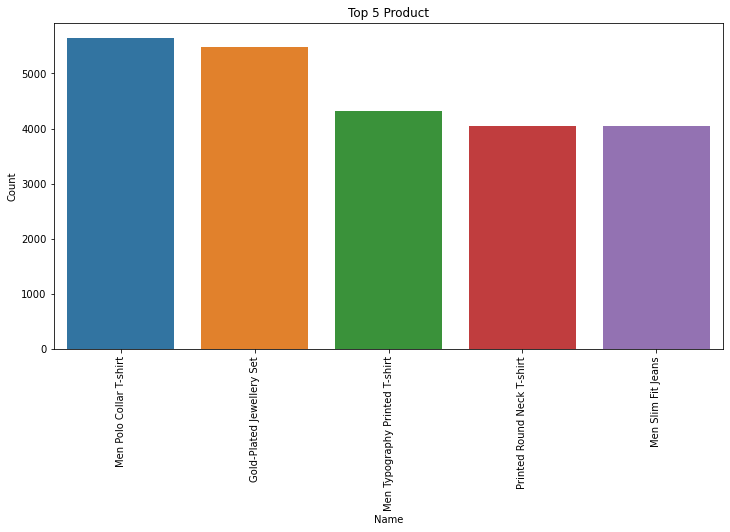

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x=top5_name.index, y=top5_name.values)
plt.xticks(rotation=90)
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Top 5 Product')
plt.show()
#Men Polo Collar T-shirt           5644
#Gold-Plated Jewellery Set         5485
#Men Typography Printed T-shirt    4326
#Printed Round Neck T-shirt        4055
#Men Slim Fit Jeans                4046

# Price

In [27]:
df['price'].describe()

count    1.060213e+06
mean     1.536235e+03
std      3.051140e+03
min      2.500000e+01
25%      4.990000e+02
50%      8.110000e+02
75%      1.497000e+03
max      2.575000e+05
Name: price, dtype: float64

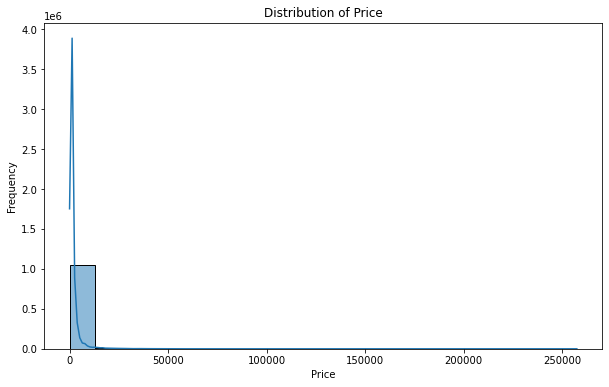

In [45]:
#Seems that logarithmic plot is better than normal histogram
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=20, kde= True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

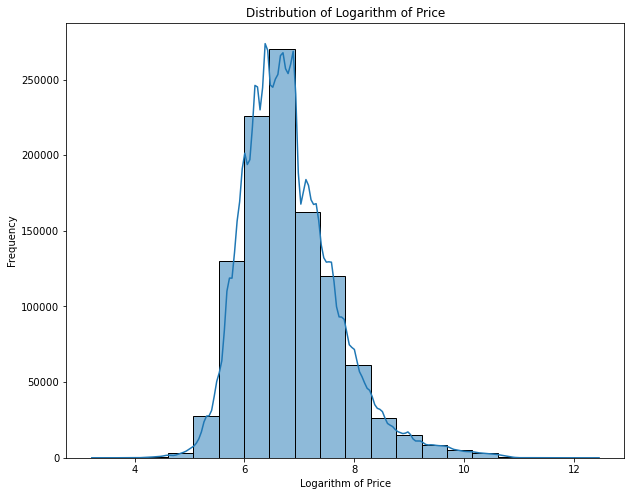

In [47]:
log_prices=np.log(df['price'])
plt.figure(figsize=(10,8))
sns.histplot(log_prices, bins=20, kde=True)
plt.xlabel('Logarithm of Price')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of Price')
plt.show()

# MRP

In [48]:
df['mrp'].describe()

count    1.060213e+06
mean     2.668379e+03
std      3.877900e+03
min      2.500000e+01
25%      9.990000e+02
50%      1.780000e+03
75%      2.999000e+03
max      2.575000e+05
Name: mrp, dtype: float64

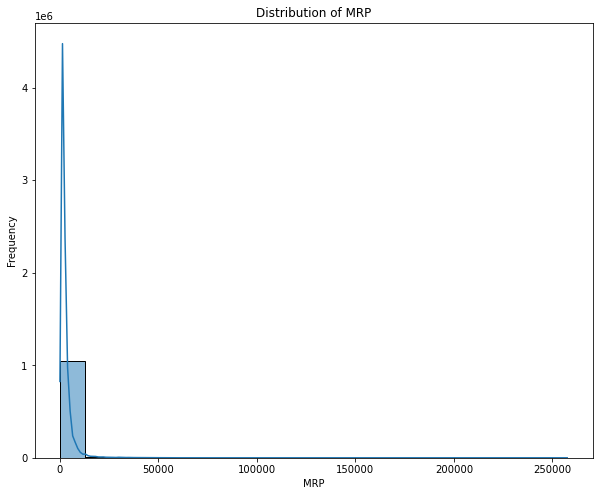

In [50]:
plt.figure(figsize=(10,8))
sns.histplot(df['mrp'],bins=20,kde=True)
plt.xlabel('MRP')
plt.ylabel('Frequency')
plt.title('Distribution of MRP')
plt.show()

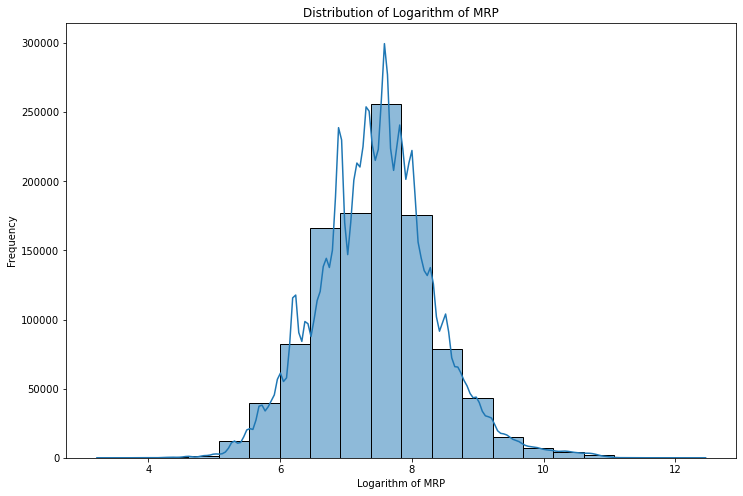

In [51]:
log_prices=np.log(df['mrp'])
plt.figure(figsize=(12,8))
sns.histplot(log_prices, bins=20, kde=True)
plt.xlabel('Logarithm of MRP')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of MRP')
plt.show()

# Rating

In [29]:
df['rating'].describe()

count    1.060213e+06
mean     1.060150e+00
std      1.829632e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.800000e+00
max      5.000000e+00
Name: rating, dtype: float64

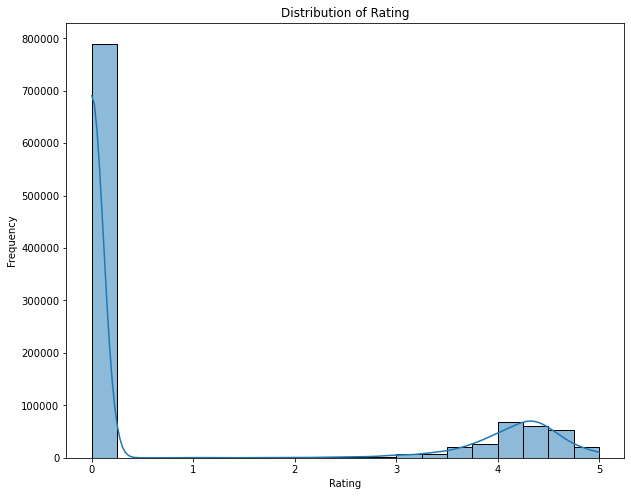

In [30]:
plt.figure(figsize=(10,8))
sns.histplot(df['rating'],bins=20,kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating')
plt.show()

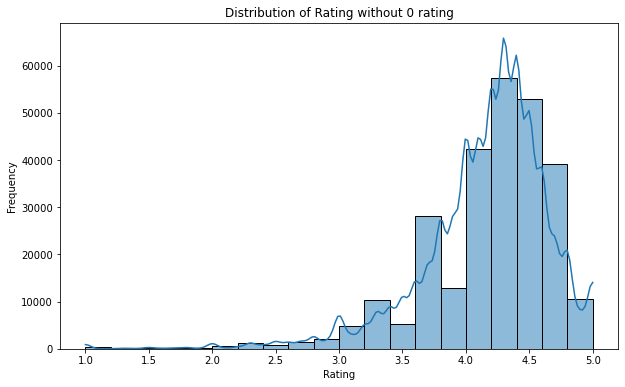

In [40]:
#Excluding rating of zero(some products didn't receive rating)
filtered_df = df[df['rating']!=0]
filtered_ratings=filtered_df['rating']
plt.figure(figsize=(10,6))
sns.histplot(filtered_ratings, bins=20, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating without 0 rating')
plt.show()

# Total Rating

In [41]:
df['ratingTotal'].describe()

count    1.060213e+06
mean     4.189618e+01
std      7.476645e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+00
max      7.640000e+04
Name: ratingTotal, dtype: float64

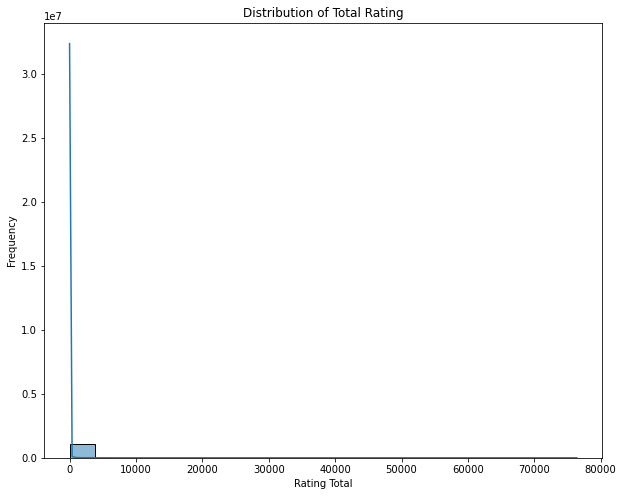

In [42]:
plt.figure(figsize=(10,8))
sns.histplot(df['ratingTotal'],bins=20,kde=True)
plt.xlabel('Rating Total')
plt.ylabel('Frequency')
plt.title('Distribution of Total Rating')
plt.show()

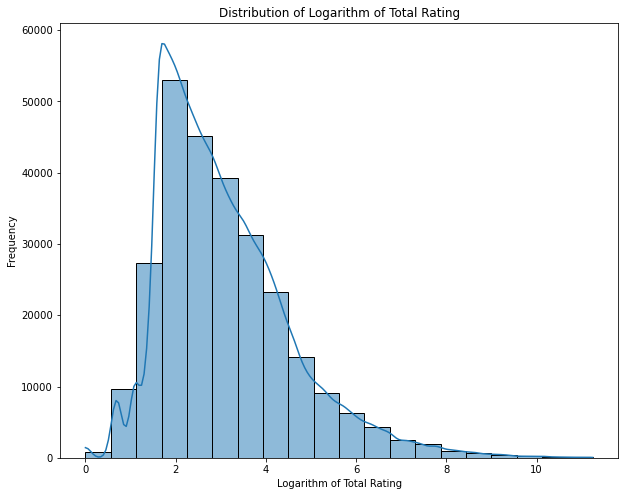

In [44]:
#Applying Logarithm of total rating
log_ratingTotal=np.log(df['ratingTotal'])
plt.figure(figsize=(10,8))
sns.histplot(log_ratingTotal, bins=20, kde=True)
plt.xlabel('Logarithm of Total Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of Total Rating')
plt.show()

In [45]:
top10=df.nlargest(10,'ratingTotal')
top10[['name','ratingTotal']]

,name,ratingTotal
271611,Toner-Lotion-Cream-Lip Balm,76400
375328,Toner-Lotion-Cream-Lip Balm,76400
950168,Men Pack of 2 Printed T-shirt,75100
254775,Unisex Skin Care Gift Set,72700
353233,Unisex Skin Care Gift Set,72700
950167,Pack Of 2 Printed T-shirts,72600
989446,Pack Of 2 Printed T-shirts,72600
990061,Pack Of 2 Printed Pure Cotton T-shirt,72500
88090,Toner-Sunscreen-Lotion-Cream,72400
232773,Sustainable Skin & Hair Care,71300


In [46]:
count_of_seller=df['seller'].value_counts()
count_of_seller

Roadster           10651
H&M                 6667
Puma                6579
max                 6486
Anouk               6158
                   ...  
Auggmin                1
BS AMOR                1
Bodyguard              1
TRU HAIR               1
Zainab chottani        1
Name: seller, Length: 5496, dtype: int64

In [48]:
top5_seller = df['seller'].value_counts().head(5)

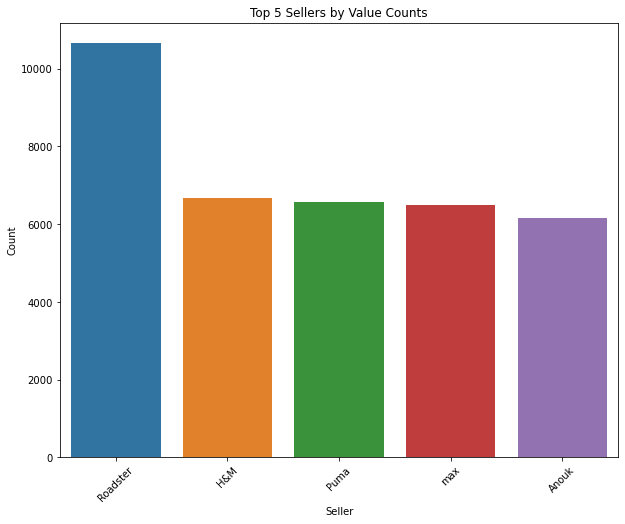

In [49]:
plt.figure(figsize=(10,8))
sns.barplot(x=top5_seller.index,y=top5_seller.values)
plt.xlabel('Seller')
plt.ylabel('Count')
plt.title('Top 5 Sellers by Value Counts')
plt.xticks(rotation=45)
plt.show()

# Highest Rated Product

In [50]:
top_products = df.sort_values(by=['rating','ratingTotal'],ascending=[False,False])
top_products=top_products.head(10)
top_products[['name','rating','ratingTotal']]

,name,rating,ratingTotal
180080,Brightening Foaming Face Wash,5.0,264
245742,Brightening Foaming Face Wash,5.0,264
376871,Brightening Foaming Face Wash,5.0,264
379391,Brightening Foaming Face Wash,5.0,264
126865,Multigreens Face Cleanser,5.0,174
128126,Multigreens Face Cleanser,5.0,174
195941,Multigreens Face Cleanser,5.0,174
131946,Soulfood Body Scrub 175 g,5.0,89
199389,Soulfood Body Scrub 175 g,5.0,89
443599,Soulfood Body Scrub 175 g,5.0,89
